In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import jel.plot as jelplot

# Load dataset 

In [2]:
# American Economic Review
aer = os.listdir("data/aer")
aer = pd.concat([pd.read_csv(f"data/aer/{x}", sep=";") for x in aer])

In [3]:
# American Economic Journal: Applied Economics
app = os.listdir("data/app")
app = pd.concat([pd.read_csv(f"data/app/{x}", sep=";") for x in app])

In [4]:
empirical_economics = os.listdir("data/empirical-economics")
empirical_economics = pd.concat([pd.read_csv(f"data/empirical-economics/{x}", sep=";") for x in empirical_economics])

In [5]:
experimental_economics = os.listdir("data/experimental-economics")
experimental_economics = pd.concat([pd.read_csv(f"data/experimental-economics/{x}", sep=";") for x in experimental_economics])

In [6]:
# Journal of Economic Literature
jel = os.listdir("data/jel")
jel = pd.concat([pd.read_csv(f"data/jel/{x}", sep=";") for x in jel])

In [7]:
# Journal of Economic Perspectives
jep = os.listdir("data/jep")
jep = pd.concat([pd.read_csv(f"data/jep/{x}", sep=";") for x in jep])

In [8]:
# Journal of Economic Growth
jeg = os.listdir("data/journal-of-economic-growth")
jeg = pd.concat([pd.read_csv(f"data/journal-of-economic-growth/{x}", sep=";") for x in jeg])

In [9]:
# Journal of Population Economics
jepe = os.listdir("data/journal-of-population-economics")
jepe = pd.concat([pd.read_csv(f"data/journal-of-population-economics/{x}", sep=";") for x in jepe])

In [10]:
# American Economic Journal: Macroeconomics
mac = os.listdir("data/mac")
mac = pd.concat([pd.read_csv(f"data/mac/{x}", sep=";") for x in mac])

In [11]:
# American Economic Journal: Economic Policy
pol = os.listdir("data/pol")
pol = pd.concat([pd.read_csv(f"data/pol/{x}", sep=";") for x in pol])

In [12]:
df = pd.concat([aer,
                app,
                empirical_economics,
                experimental_economics,
                jel,
                jep,
                jeg,
                jepe,
                mac,
                pol])

# exclude year == 2024 because the year hasn't ended yet as of this writing.
df = df[df.year < 2024]

In [13]:
df["primary"] = df.apply(lambda x: x.jel[0], axis=1)
df["secondary"] = df.apply(lambda x: x.jel[:2], axis=1)
df["tertiary"] = df.apply(lambda x: x.jel[:3], axis=1)
df.head()

,journal,year,url,jel,primary,secondary,tertiary
0,American Economic Review,2012,https://www.aeaweb.org/articles?id=10.1257/aer...,Y20,Y,Y2,Y20
1,American Economic Review,2012,https://www.aeaweb.org/articles?id=10.1257/aer...,Y20,Y,Y2,Y20
2,American Economic Review,2012,https://www.aeaweb.org/articles?id=10.1257/aer...,F32,F,F3,F32
3,American Economic Review,2012,https://www.aeaweb.org/articles?id=10.1257/aer...,G01,G,G0,G01
4,American Economic Review,2012,https://www.aeaweb.org/articles?id=10.1257/aer...,D11,D,D1,D11


In [14]:
# Check number of papers
len(set(df.url))

10011

# Check number of papers by journal
df.groupby("journal")["url"].nunique().reset_index().rename(columns={"url": "count"})

# Create indicators

## JEL Classification Code with the highest count

In [15]:
# Primary
## Microeconomics
df.groupby("primary").size().reset_index().rename(columns={0: "count"}).sort_values(by="count", ascending=False).head()

,primary,count
9,D,5175
15,J,4698
10,E,4216
8,C,3548
20,O,2947


In [16]:
df_d = df[df.primary == "D"].groupby("year").size().reset_index().rename(columns={0: "count"})
df_d.head()

,year,count
0,1991,16
1,1992,7
2,1993,8
3,1994,6
4,1995,9


In [17]:
# Secondary
## Economic Development
df.groupby("secondary").size().reset_index().rename(columns={0: "count"}).sort_values(by="count", ascending=False).head()

,secondary,count
165,O1,1746
118,J1,1647
56,D8,1480
119,J2,1259
110,I1,1198


In [18]:
o1 = df[df.secondary == "O1"].groupby("year").size().reset_index().rename(columns={0: "count"})
o1.head()

,year,count
0,1991,3
1,1992,2
2,1993,4
3,1994,1
4,1995,4


In [19]:
# Tertiary
## Business Fluctuations; Cycles
df.groupby("tertiary").size().reset_index().rename(columns={0: "count"}).sort_values(by="count", ascending=False).head()

,tertiary,count
263,E32,705
517,J24,574
522,J31,549
224,D83,500
171,D12,457


In [20]:
e32 = df[df.tertiary == "E32"].groupby("year").size().reset_index().rename(columns={0: "count"})
e32.head()

,year,count
0,1991,1
1,1993,4
2,1996,2
3,1999,5
4,2000,5


In [21]:
count_by_year = df.groupby(["year", "jel"]).size().reset_index().rename(columns= {0: "count"})
count_by_year = count_by_year.sort_values(by=["jel", "year"], ascending=True)
count_by_year.head()

,year,jel,count
8490,2023,\nC14\n,1
8491,2023,\nE24,2
8492,2023,\nE40\n,1
8493,2023,\nF43\n,1
8494,2023,\nO11,2


## Annual count for a certain JEL classification code

In [22]:
# Education and Research Institutions
i2 = df[df.secondary == "I2"].groupby("year").size().reset_index().rename(columns={0: "count"})
i2.head()

,year,count
0,1991,2
1,1992,1
2,1993,3
3,1996,4
4,1998,3


## JEL Classification Code with the highest average annual growth

In [23]:
# here

# Visualize

## JEL Classification Code with the highest count

### Primary

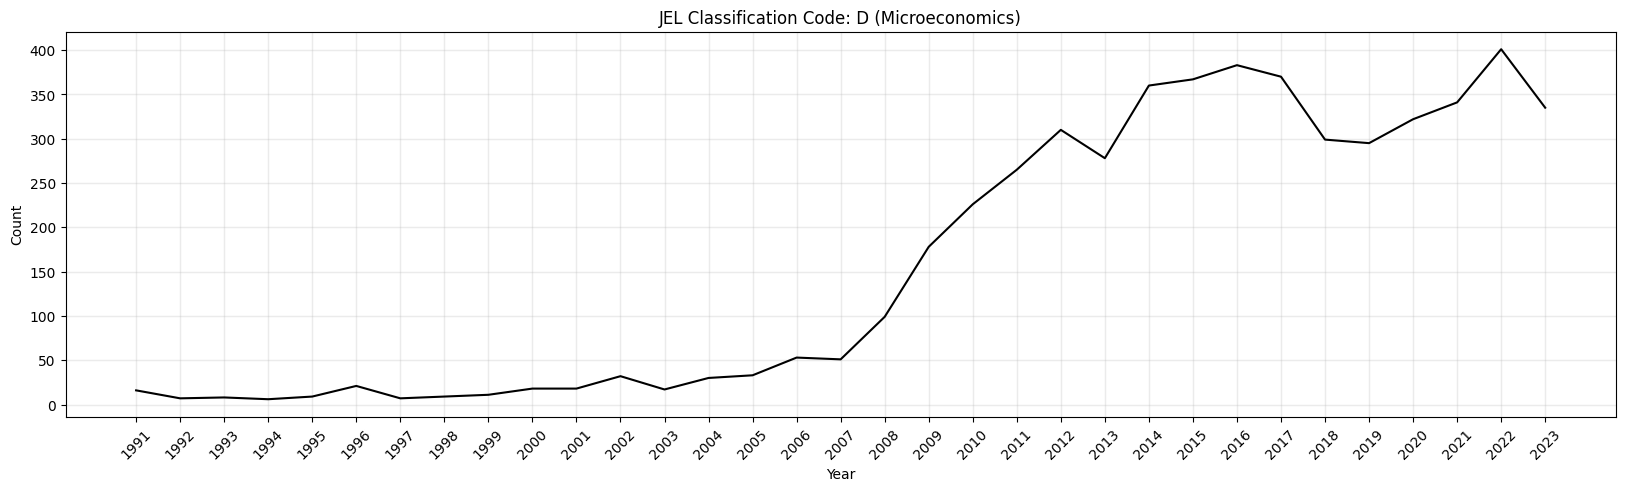

In [24]:
# Business Fluctuations; Cycles
jelplot.highest_jel(df=df_d, jel="D (Microeconomics)")

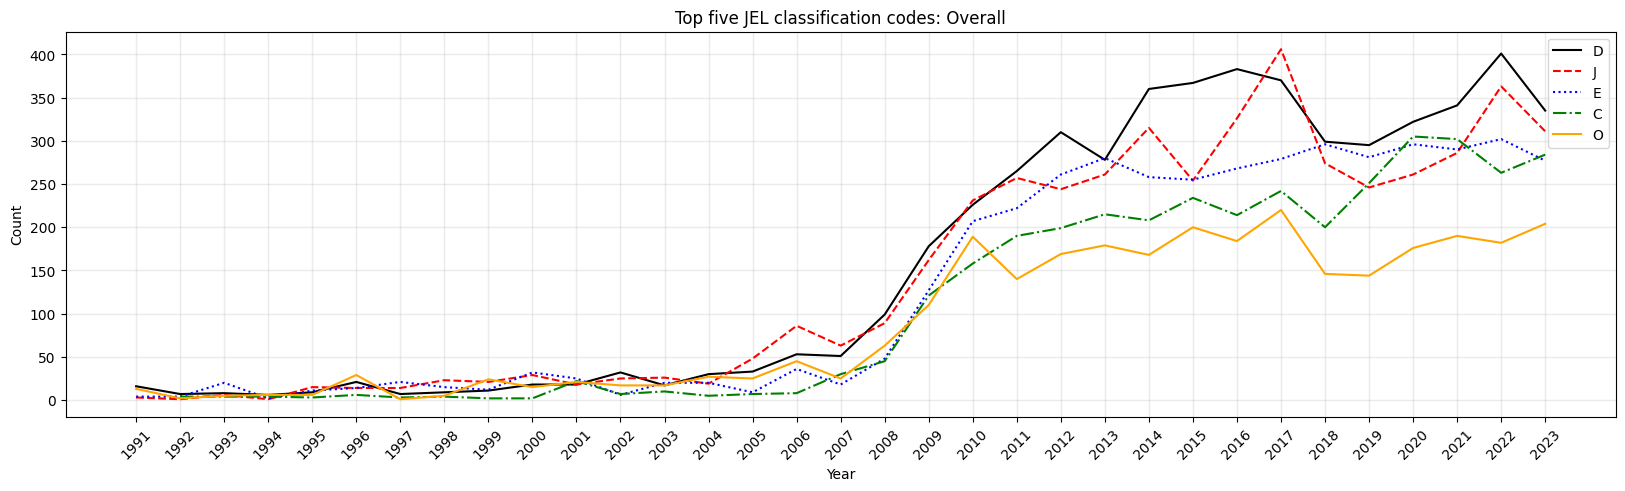

In [34]:
jelplot.top_five_jel(df=df, column="primary", journal_name="Overall", y_interval=50)

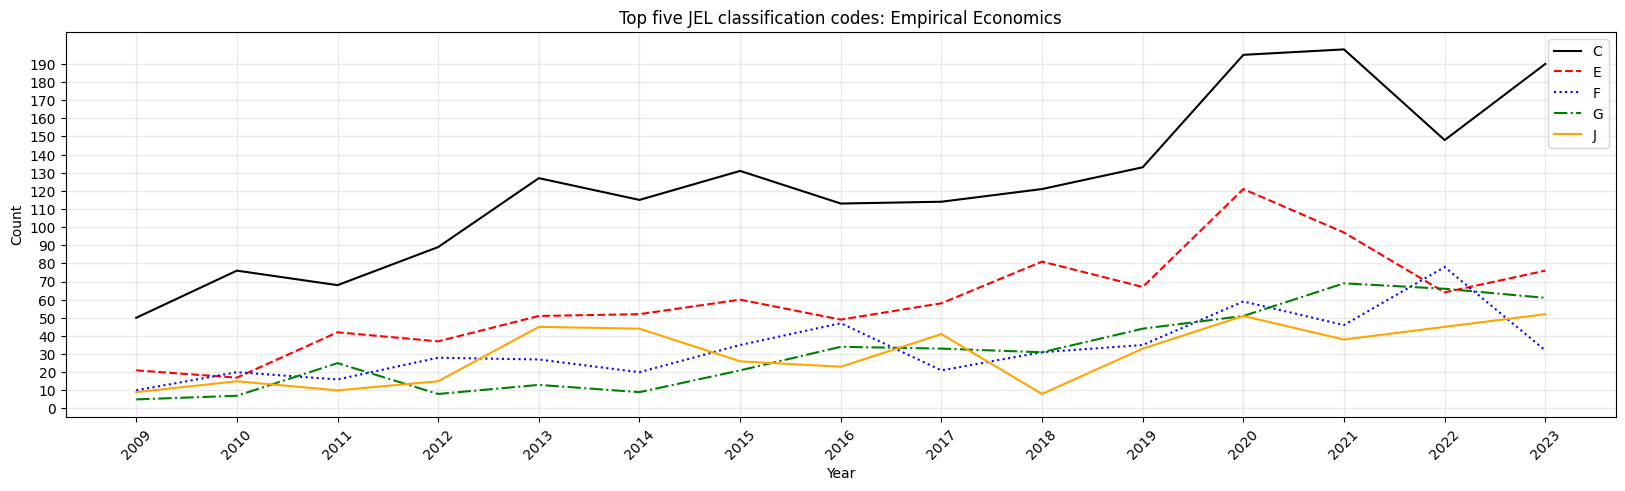

In [37]:
empirical_economics = df[df.journal == "Empirical Economics"]
jelplot.top_five_jel(df=empirical_economics, column="primary", journal_name="Empirical Economics")

### Secondary

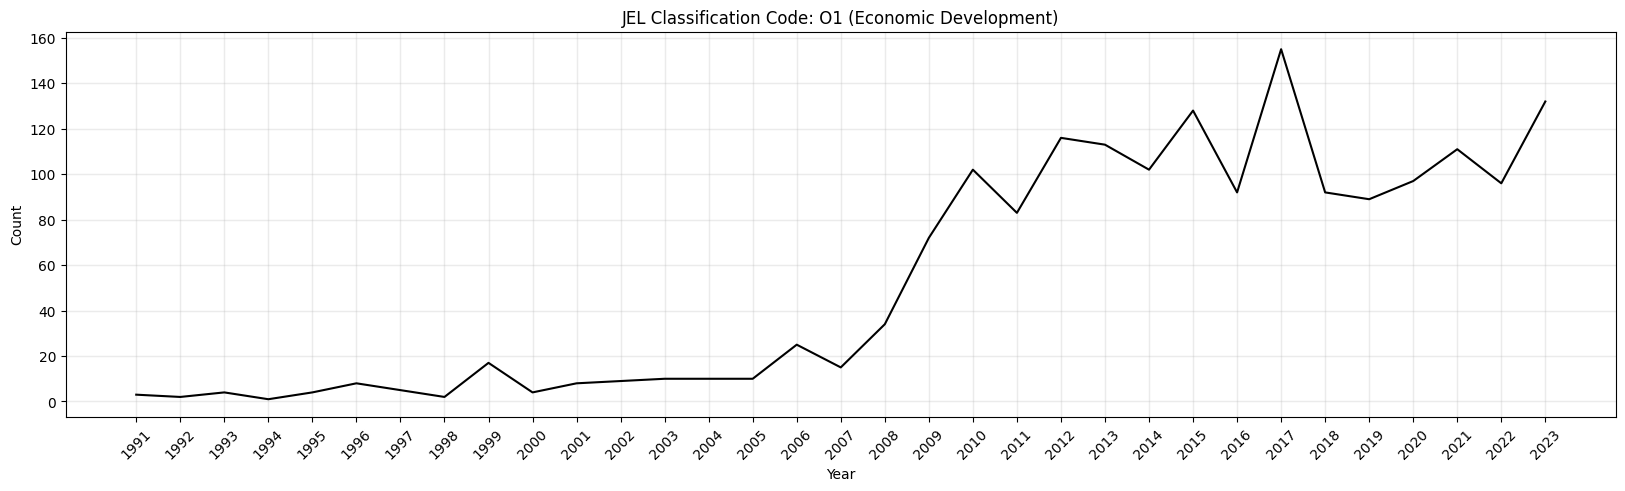

In [27]:
# Business Fluctuations; Cycles
jelplot.highest_jel(df=o1, jel="O1 (Economic Development)")

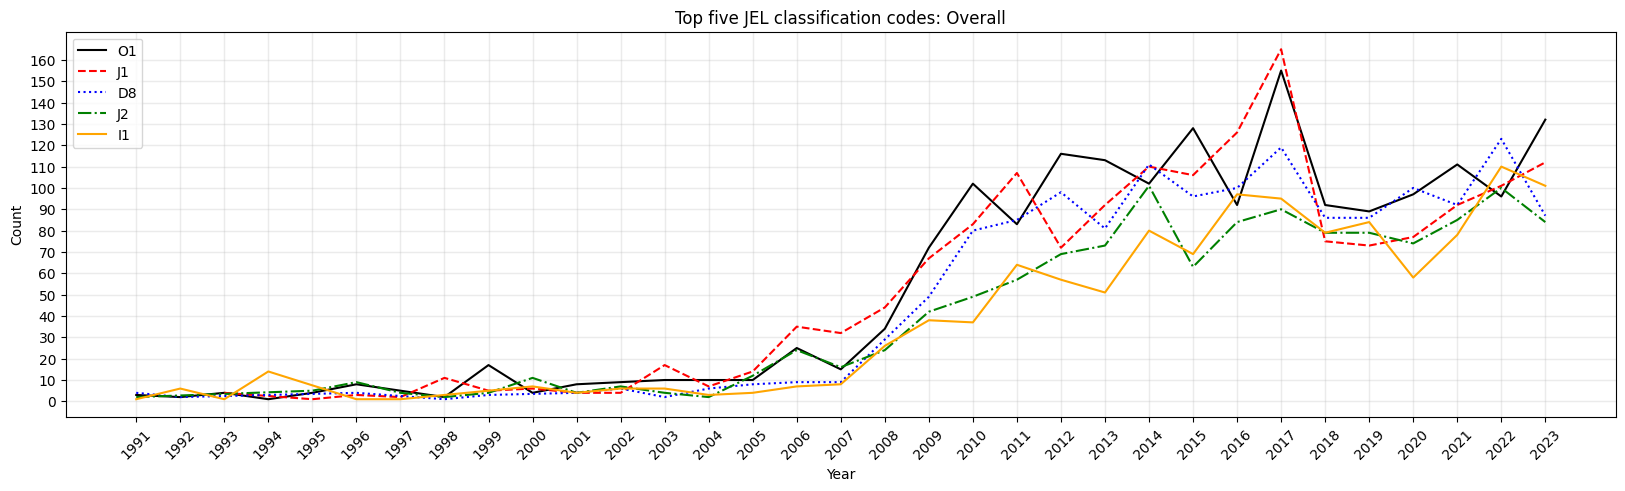

In [28]:
jelplot.top_five_jel(df=df, column="secondary", journal_name="Overall")

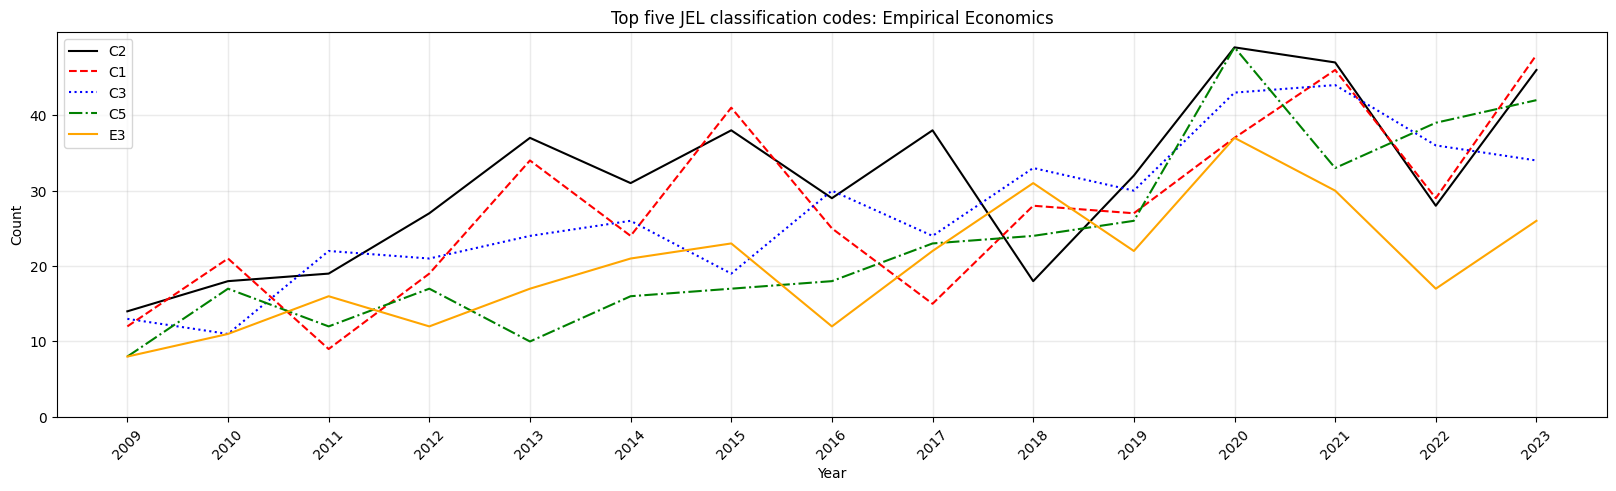

In [29]:
empirical_economics = df[df.journal == "Empirical Economics"]
jelplot.top_five_jel(df=empirical_economics, column="secondary", journal_name="Empirical Economics")

### Tertiary

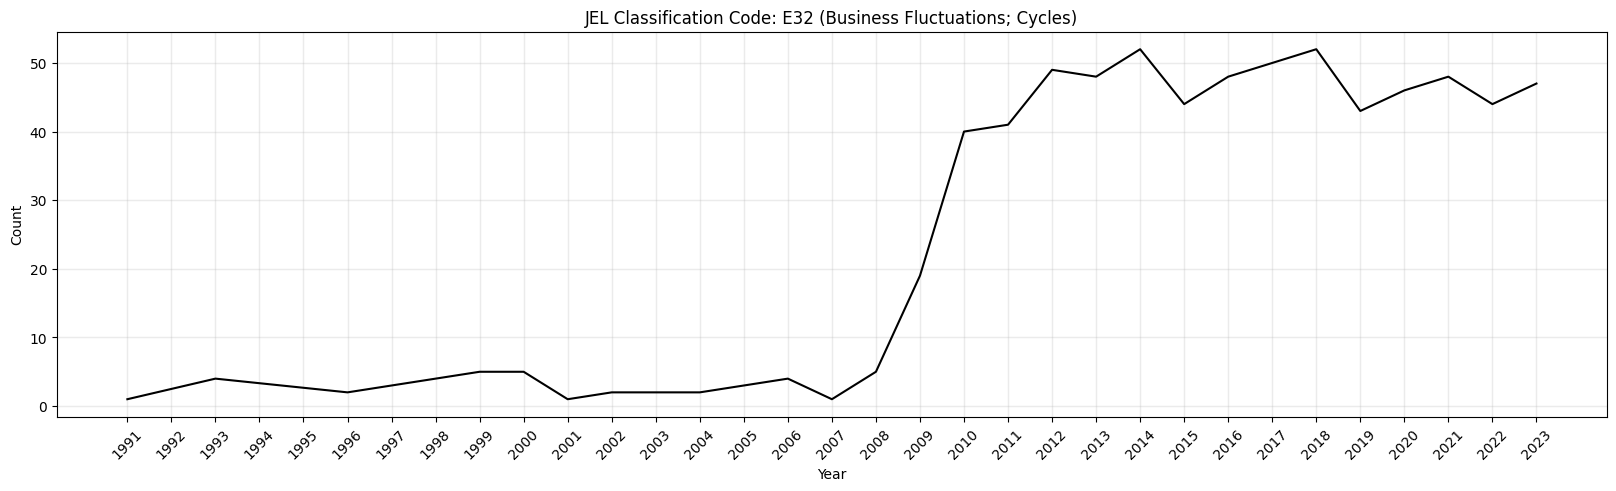

In [30]:
# Business Fluctuations; Cycles
jelplot.highest_jel(df=e32, jel="E32 (Business Fluctuations; Cycles)")

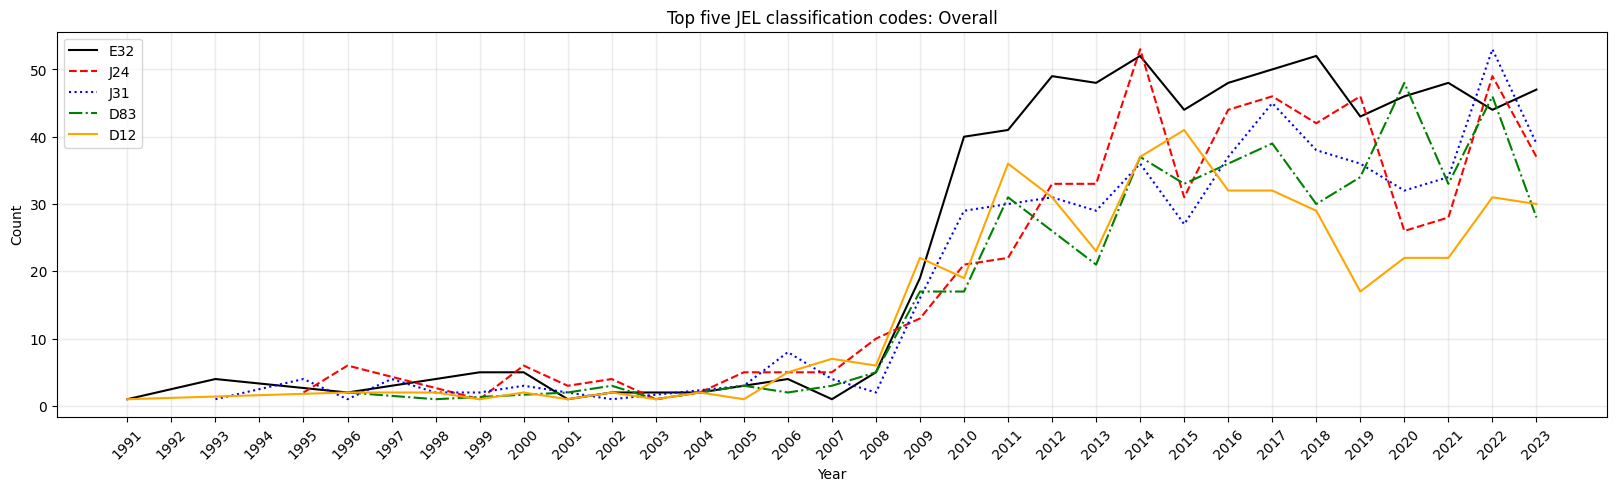

In [31]:
jelplot.top_five_jel(df=df, column="tertiary", journal_name="Overall")

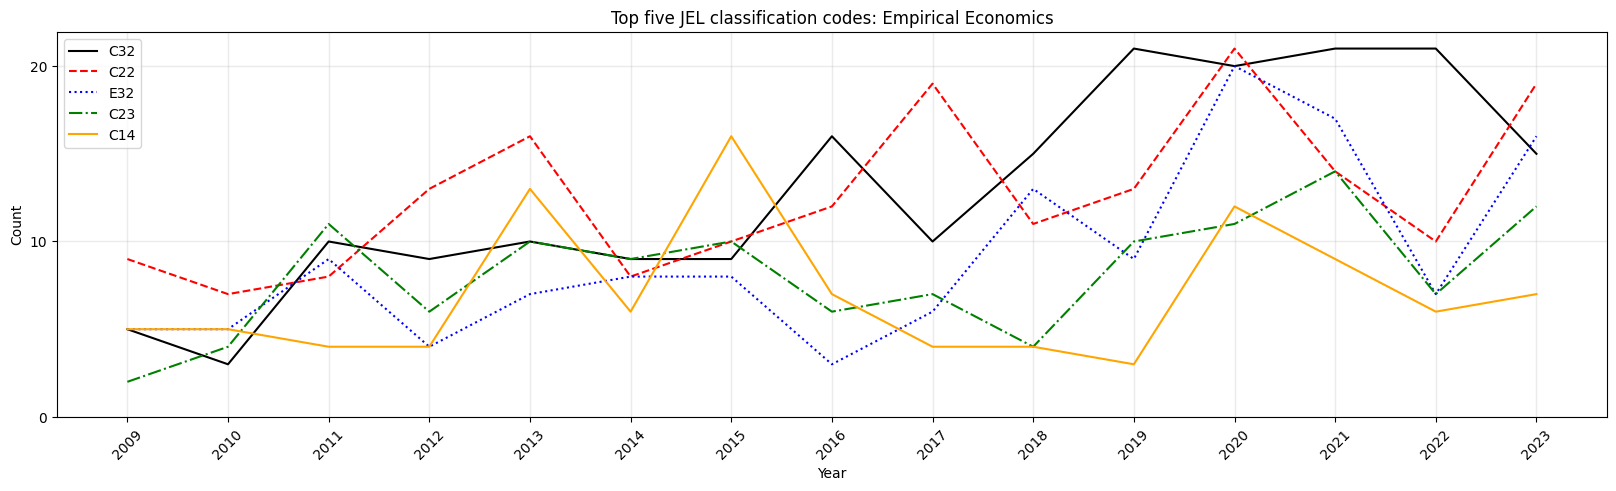

In [32]:
empirical_economics = df[df.journal == "Empirical Economics"]
jelplot.top_five_jel(df=empirical_economics, column="tertiary", journal_name="Empirical Economics")

## Annual count for a certain JEL classification code

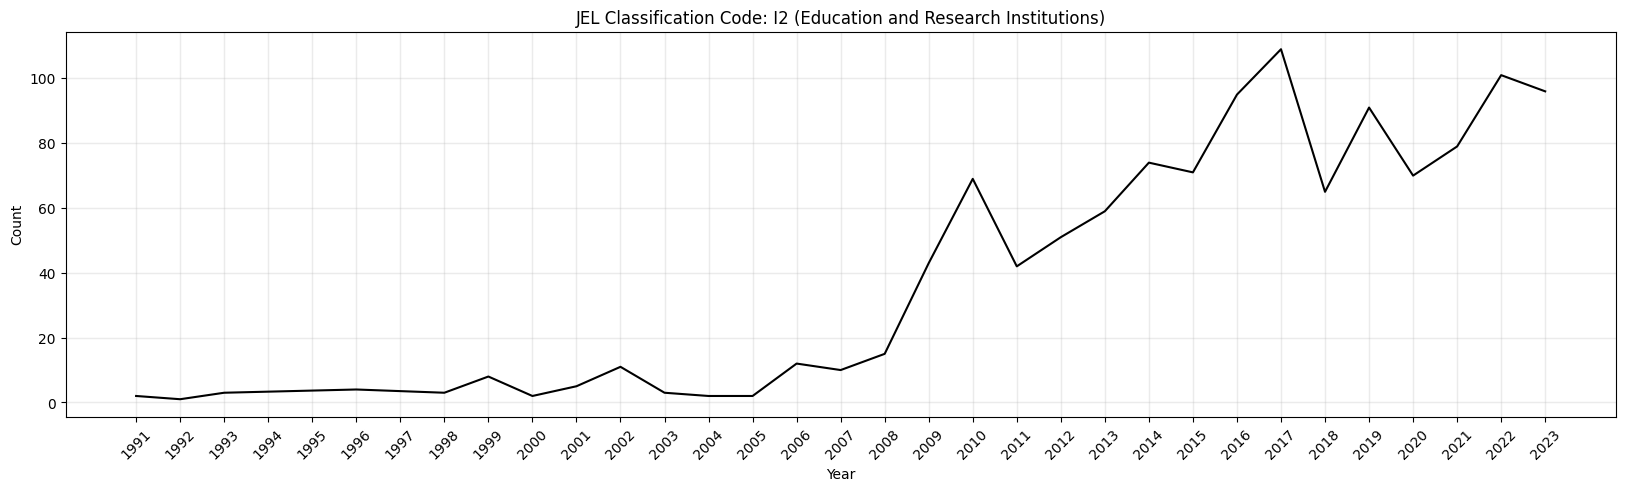

In [33]:
jelplot.highest_jel(df=i2, jel="I2 (Education and Research Institutions)")